### NAME: Bùi Phương Thảo
### ID: 11215341
### Class: DSEB 63

### Problem 1
#### Re-implement PCA by using numpy.

Steps in PCA:
* Data standardization <subtract mean - dua mean cua dataset ve 0?>
* Covariance matrix 
* Compute eigenvectors and eigenvalues
* Sort eigen in descending order
* Select a subset from the eigenval matrix
* Data transformation

In [43]:
ma = np.array([[1,2,3,4],[2,4,6,8],[8,9,10,12]])

In [81]:
ma

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 8,  9, 10, 12]])

In [83]:
np.mean(ma,axis = 1)

array([2.5 , 5.  , 9.75])

In [44]:
cov = np.cov(ma,rowvar = False)

In [45]:
cov

array([[14.33333333, 13.5       , 12.66666667, 14.        ],
       [13.5       , 13.        , 12.5       , 14.        ],
       [12.66666667, 12.5       , 12.33333333, 14.        ],
       [14.        , 14.        , 14.        , 16.        ]])

In [46]:
np.linalg.eigh(cov)

(array([-1.12312414e-14,  1.25715671e-16,  1.30923528e+00,  5.43574314e+01]),
 array([[ 0.49431067, -0.01968858, -0.70972875, -0.50155201],
        [-0.81042328, -0.24462571, -0.21285172, -0.4879206 ],
        [-0.0402835 ,  0.83232003,  0.28402531, -0.47428919],
        [ 0.3118466 , -0.49700502,  0.60853009, -0.53425541]]))

In [51]:
np.linalg.eigh(cov)[1][:,0:2]

array([[ 0.49431067, -0.01968858],
       [-0.81042328, -0.24462571],
       [-0.0402835 ,  0.83232003],
       [ 0.3118466 , -0.49700502]])

In [47]:
np.linalg.eig(cov)

(array([ 5.43574314e+01,  1.30923528e+00, -4.59043601e-15,  1.32676623e-16]),
 array([[-0.50155201,  0.70972875,  0.487009  , -0.10557825],
        [-0.4879206 ,  0.21285172, -0.83621019, -0.09956747],
        [-0.47428919, -0.28402531,  0.07358558,  0.82659365],
        [-0.53425541, -0.60853009,  0.24116366, -0.54376694]]))

In [1]:
import numpy as np

In [66]:
def pca(X,n):
    #X(M,N)
    #Step 1: mean-centering matrix
    mean = np.mean(X,axis = 0)
    X_mean = X - mean
    
    #Step 2: Calculate covariance matrix
    cov = np.cov(X_mean, rowvar = False) #cov (NxN)
    
    #Step 3: Compute eigenvalue and eigenvector 
    eival, eivec = np.linalg.eigh(cov,UPLO = 'U') #eivec(NxN)
    #eivec = eivec.T
    
    #Step 4: Sort them in descending order
    sorted_index = np.argsort(eival)[::-1]
    sorted_eival = eival[sorted_index]
    sorted_vector = eivec[:,sorted_index]
    #sorted_vector = eivec[sorted_index]
    
    #Step 5: Select a subset
    subset = sorted_vector[:,0:n] #subset(N,D)
    #subset = sorted_vector[0:n]  #subset(N,D)
    #Step 6: Transform data 
    X_reduced = np.dot(X_mean,subset)
    return X_reduced
    
    

### Problem 2
Load MNIST dataset (preferably from keras, but you can use sklearn if you want)
Visualize the image.
Then use PCA to reduce the dimensity of the data. Then visualize all the data.

In [3]:
from sklearn import datasets
data = datasets.load_iris()

In [4]:
X = data.data
y = data.target

In [5]:
def label(y):
    if y == 0:
        return 'setosa'
    elif y == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [6]:
import pandas as pd

In [7]:
y = pd.Series(y).apply(label)
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

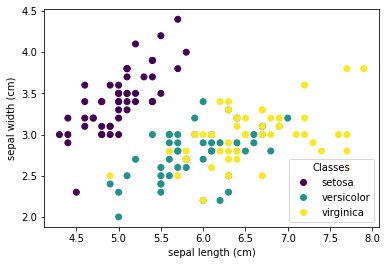

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
ax.set(xlabel=data.feature_names[0], ylabel=data.feature_names[1])
fig = ax.legend(scatter.legend_elements()[0], data.target_names, loc="lower right", title="Classes")

In [67]:
reduced = pca(X,2)

In [68]:
reduced_df = pd.DataFrame(reduced , columns = ['PC1','PC2'])
reduced_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [69]:
df = pd.concat([reduced_df,y],axis = 1)

In [70]:
import seaborn as sns

In [71]:
df.columns = ['PC1','PC2','y']

In [72]:
df

,PC1,PC2,y
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

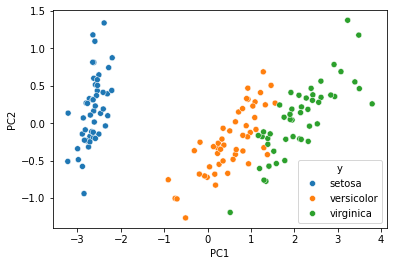

In [73]:
sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'y')

In [60]:
## compare with PCA in SKLEARN

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca0 = PCA(n_components=2)
principal = pca0.fit_transform(X)
principal_df = pd.DataFrame(data = principal, columns = ['principal component 1', 'principal component 2'])

In [63]:
final_df = pd.concat([principal_df, y], axis = 1)

In [64]:
final_df.columns = ['principal component 1', 'principal component 2','y']

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

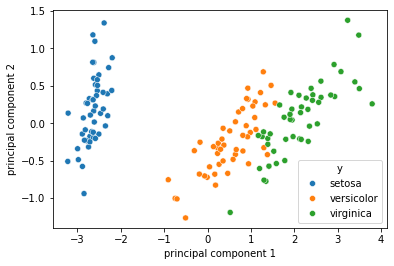

In [65]:
sns.scatterplot(data = final_df, x = 'principal component 1', y = 'principal component 2', hue = 'y')

In [22]:
# Prob 3:
from sklearn import datasets
data1 = datasets.load_digits()

In [23]:
digit1 = data1.data
target = data1.target
label = data1.target_names

In [24]:
digit = pd.DataFrame(digit1)

In [25]:
digit.columns = data1.feature_names

In [26]:
y1 = pd.Series(target)

In [27]:
digit['target'] = y1
digit

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [28]:
digit1

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
digit2 = data1.images

In [30]:
digit2[0].shape

(8, 8)

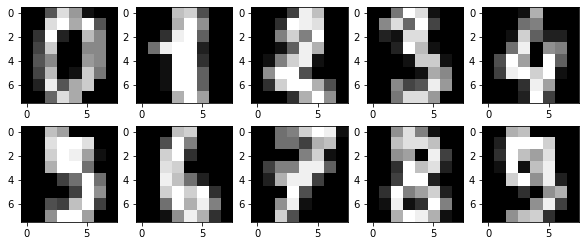

In [31]:
plt.figure(figsize=(10, 4))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    img = digit2[i-1]
    # And displaying the image
    plt.imshow(img, cmap="gray")

In [74]:
di_re = pca(digit,2)

In [75]:
di_df = pd.DataFrame(di_re,columns = ['pc1','pc2'])

In [76]:
di_df['y'] = y1

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

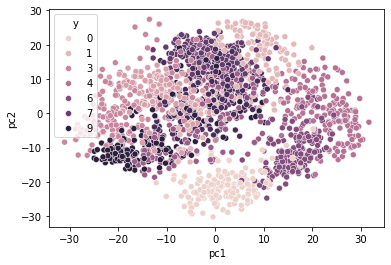

In [77]:
sns.scatterplot(di_df, x = 'pc1', y = 'pc2', hue = 'y')

In [78]:
pca1 = PCA(n_components=2)
principal1 = pca1.fit_transform(digit)
principal_df1 = pd.DataFrame(data = principal1, columns = ['principal component 1', 'principal component 2'])

In [79]:
final_df1 = pd.concat([principal_df1, y1], axis = 1)
final_df1.columns = ['principal component 1', 'principal component 2','y']

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

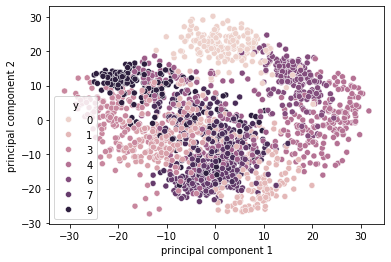

In [80]:
sns.scatterplot(data = final_df1, x = 'principal component 1', y = 'principal component 2', hue = 'y')